In [1]:
import matplotlib.pyplot as plt
from pyrpl import Pyrpl
import numpy as np
import time
from datetime import datetime
from IPython.core.display import display, HTML
import glob
import os

DEBUG:pyrpl.attributes:SelectProperty unit of module None has no options!
DEBUG:pyrpl.attributes:SelectProperty unit of module None has no options!
DEBUG:pyrpl.attributes:SelectProperty unit of module None has no options!
DEBUG:pyrpl.attributes:SelectProperty unit of module None has no options!
DEBUG:pyrpl.attributes:SelectProperty default_sweep_output of module None has no options!
DEBUG:pyrpl.attributes:SelectProperty default_sweep_output of module None has no options!
DEBUG:pyrpl.attributes:SelectProperty default_sweep_output of module None has no options!
DEBUG:pyrpl.attributes:SelectProperty default_sweep_output of module None has no options!
DEBUG:pyrpl.attributes:SelectProperty default_sweep_output of module None has no options!
DEBUG:pyrpl.attributes:SelectProperty default_sweep_output of module None has no options!
DEBUG:pyrpl.attributes:SelectProperty default_sweep_output of module None has no options!
DEBUG:pyrpl.attributes:SelectProperty default_sweep_output of module None 

In [3]:
HOSTNAME = "rp-f07198.local" # hostname of the red pitaya
p = Pyrpl('test', hostname=HOSTNAME, gui=True)

INFO:pyrpl:All your PyRPL settings will be saved to the config file
    /Users/gsteele/pyrpl_user_dir/config/test.yml
If you would like to restart PyRPL with these settings, type "pyrpl.exe test" in a windows terminal or 
    from pyrpl import Pyrpl
    p = Pyrpl('test')
in a python terminal.
INFO:pyrpl.redpitaya:Successfully connected to Redpitaya with hostname rp-f07198.local.


In [44]:
def do_sweep(prefix="test", start = 0, stop = 60e6, pts=101):
    t0 = time.time()
    # shortcut for na
    na = p.networkanalyzer
    na.iq_name = 'iq1'

    # setup network analyzer with the right parameters
    na.setup(start=start,stop=stop,points=pts,rbw=1000,
             amplitude=0.2,input='iq1',output_direct='off', 
             acbandwidth=0)

    #take transfer functions. first: iq1 -> iq1, second iq1->out1->(your cable)->adc1
    data1 = na.single()
    na.setup(input='in1', output_direct='out1')
    data2 = na.single()

    # get x-axis for plotting
    #f = na.frequencies
    f = np.linspace(start, stop, pts)
    print("Time: %.2f" % (time.time()-t0))

    fmt = prefix + "_%Y-%m-%d-%H_%M_%S.dat"
    outname = datetime.now().strftime(fmt)
    print("File saved to", outname)
    np.savetxt(outname, np.array([f,data1,data2]).T)
    
    #plt.plot(f,np.real(data))
    plt.subplots(figsize=(12,4))
    plt.subplot(121)
    plt.plot(f,np.abs(data1))
    plt.plot(f,np.abs(data2))
    plt.title(outname)
    plt.subplot(122)
    plt.plot(f,np.abs(data1))
    plt.plot(f,np.abs(data2))
    plt.yscale('log')
    plt.title(outname)


    plt.savefig(outname+".png")

Time: 5.13
File saved to HP_input_terminated_2021-01-08-17_46_58.dat


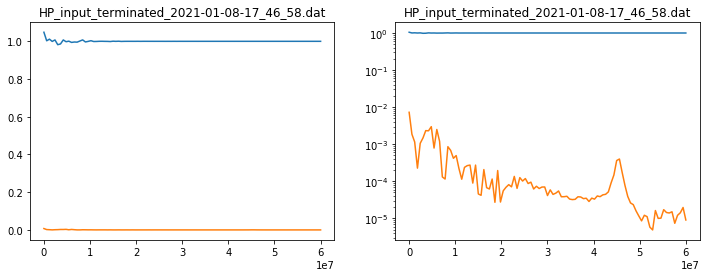

In [45]:
do_sweep("HP_input_terminated")

# All plots

In [31]:
html = ""
files = glob.glob("*.png")
files.sort(key=os.path.getmtime)
for f in files:
    html += "<img src=%s>" % f
display(HTML(html))

OK, I'm quite confused and don't understand what is going on....let's try testing stuff first in the Bode analyzer built into the RP. 

# VNA measurements of filters

Since I was not sure about the expected response of the filters, I double checked it on the VNA at work. It looks nothing like the measurement with PYRPL, and also not anything like the "bode analyzer" built into the RP....

In [40]:
html = ""
files = glob.glob("*_14*.jpg")
files += glob.glob("*_15*.jpg")
files.sort(key=os.path.getmtime)
for f in files:
    html += "<img src=%s width=30%%>" % f
display(HTML(html))

# Bode analyzer software results

They look reasonable, but with some extra resonances that I do not see in my VNA, maybe due to port impedance resonances of the RP. 

In [39]:
html = ""
files = glob.glob("*_17*.jpg")
files.sort(key=os.path.getmtime)
for f in files:
    html += "<img src=%s width=30%%>" % f
display(HTML(html))

May get better if I terminate both input ports, although I need another tee from work to do that...

# Try PyRPL GUI

I've been resisting so far, but maybe it's time to try the GUI :)

In [5]:
! open .

<img src=out_to_in.png>

This looks reasonable. Disconnect the cable:

<img src=not_connected.png>

Pretty good, 100 dB. 

<img src="1.9MHz_LPF.png">

Looks good! Note, switched to a linear frequency scale. Now try the 25 MHz HPF:

<img src="25MHz_HPF.png">

Also looks reasonable. Some weird peaks, but I think these come from the RP. 

Now just need to figure out how to get the code to do this in the notebook. 

In [9]:
na = p.networkanalyzer
data2 = na.single()

ERROR:pyrpl.redpitaya_client:Error occured in reading attempt 0. Reconnecting at addr 0x40120000 to _reads value 16384 by client 3
ERROR:pyrpl.redpitaya_client:Error occured in reading attempt 1. Reconnecting at addr 0x40120000 to _reads value 16384 by client 4
